# Dataset Overview

### Dataset description, modalities distribution and visualization

## Imports

In [20]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import ImageGrid

# FIXME: Remove the two first instructions
import sys
sys.path.append('./DataLoader')

from DataLoader.Dataset import Dataset

# Make the results reproducible
np.random.seed(2563)

## Dataset path specification, creation of a Dataset container

In [2]:
DATASET_PATH= './Data'
ds = Dataset(path=DATASET_PATH)

## Dataset size

In [3]:
ds_size = len(ds)
print(f'The dataset size is {ds_size}')

The dataset size is 10


## Pie chart creation function

In [4]:
from collections import Counter

#TODO: Add percentages
def category_pie(dataset, attribute_getter, figure_name):
    def category_list():
        categories = []
        for datapoint in dataset:
            categories += [attribute_getter(datapoint)]

        return categories
    count_dict = Counter(category_list())
    plt.figure()
    plt.title(figure_name)
    plt.pie(count_dict.values(), labels=count_dict.keys())


## Dataset distribution analysis

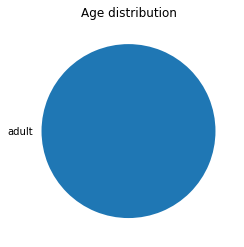

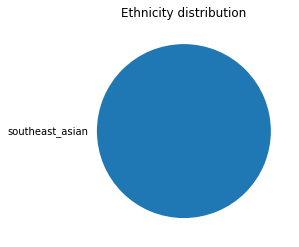

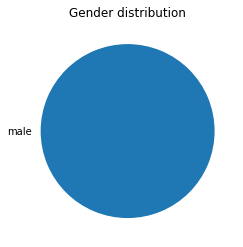

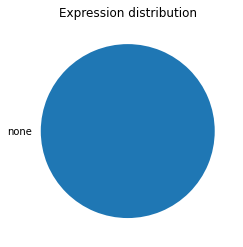

In [5]:
category_pie(ds, lambda dp : dp.identity_label.age, 'Age distribution')
category_pie(ds, lambda dp : dp.identity_label.ethnicity, 'Ethnicity distribution')
category_pie(ds, lambda dp : dp.identity_label.gender, 'Gender distribution')
category_pie(ds, lambda dp : dp.face_expression.name, 'Expression distribution')

## Dataset visualization

Normalize and clamp infinite values from depth map for better visualization

In [ ]:
def normalize_depth_map(depth_map):
    depth_map = depth_map.copy()
    depth_map[depth_map > 2**15] = 0
    depth_map -= depth_map.min()
    depth_map /= depth_map.max()
    return depth_map

Set a random color map for segmentation visualization and apply it to segmentation map

In [ ]:
segmap_colormap = (np.random.uniform(size=(1,1,3)) * 255).astype('uint8')

def segmap_to_color(segmap):
    segmap = np.repeat(segmap[..., np.newaxis], 3, axis=2)
    segmap = (np.sin(segmap * 255/20) * 127 + 128).astype('uint8')
    segmap += segmap_colormap
    return segmap

Visualize the dataset as a grid

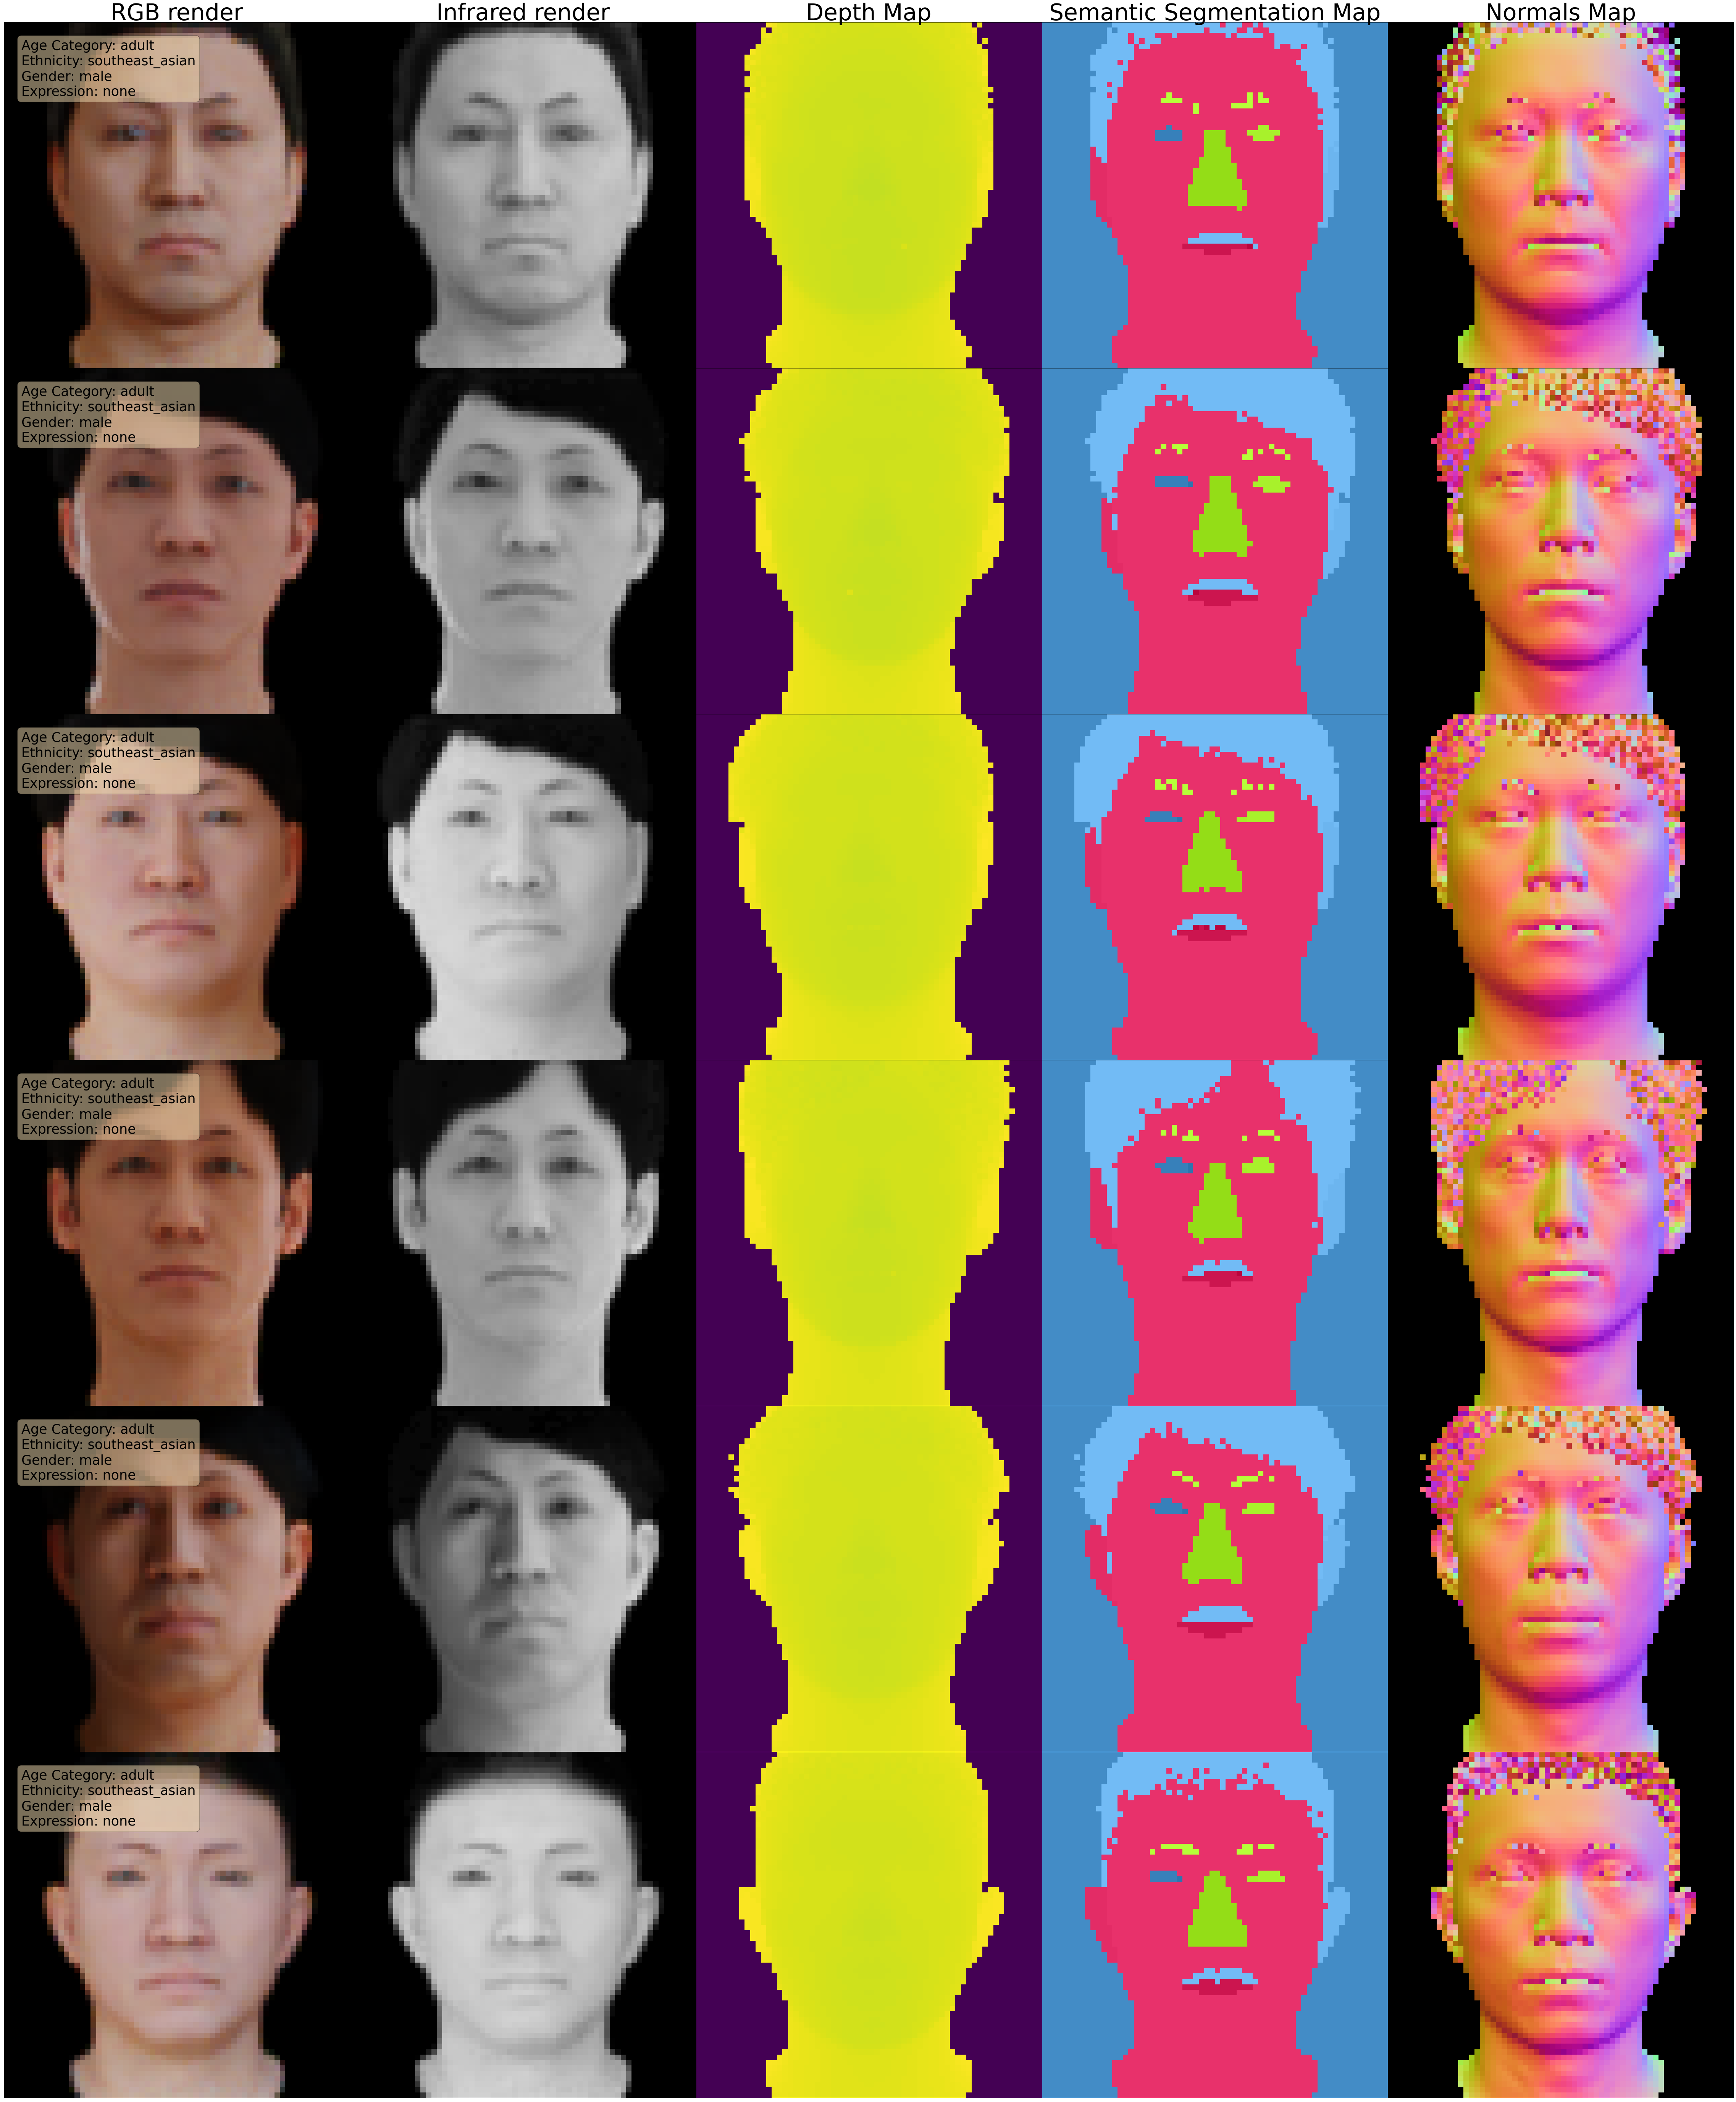

In [19]:
#TODO Add landmarks
#FIXME remove warnings, fix depth map


items_to_plot = min(len(ds), 6)
imgs_per_dp = 5
imgs, labels = [], []

for i in range(items_to_plot):
    imgs += [ds[i].rgb_img, ds[i].ir_img, normalize_depth_map(ds[i].depth_img), segmap_to_color(ds[i].semantic_seg_map), ds[i].normals_map]
    labels += imgs_per_dp*[{'Age Category': ds[i].identity_label.age, 'Ethnicity': ds[i].identity_label.ethnicity, 'Gender': ds[i].identity_label.gender, 'Expression': ds[i].face_expression.name}]

font_size = 60
fig_shape = np.array((items_to_plot, 5))
fig_size = 20 * fig_shape
fig = plt.figure(figsize=fig_size)
grid = ImageGrid(fig, 111, nrows_ncols=fig_shape, axes_pad=0.)

grid[0].set_title('RGB render', size=font_size)
grid[1].set_title('Infrared render', size=font_size)
grid[2].set_title('Depth Map', size=font_size)
grid[3].set_title('Semantic Segmentation Map', size=font_size)
grid[4].set_title('Normals Map', size=font_size)

props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)

for cnt, (ax, im, label) in enumerate(zip(grid, imgs, labels)):
    ax.get_xaxis().set_ticks([])
    ax.get_yaxis().set_ticks([])
    ax.imshow(im)
    formatted_label = '\n'.join(key + ': ' + val for key, val in label.items())
    if cnt % imgs_per_dp == 0:
        ax.text(0.05, 0.95, formatted_label, transform=ax.transAxes, fontsize=35, verticalalignment='top', bbox=props)
